In [ ]:
import pandas as pd
import numpy as np

In [ ]:
path="/content/drive/MyDrive/Colab Notebooks/diabetes.csv"

In [ ]:
df1=pd.read_csv(path)

In [ ]:
df1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


#using head show the data 

In [ ]:
df1.sample(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
306,10,161,68,23,132,25.5,0.326,47,1
663,9,145,80,46,130,37.9,0.637,40,1
259,11,155,76,28,150,33.3,1.353,51,1
115,4,146,92,0,0,31.2,0.539,61,1
484,0,145,0,0,0,44.2,0.630,31,1
349,5,0,80,32,0,41.0,0.346,37,1
388,5,144,82,26,285,32.0,0.452,58,1
284,2,108,80,0,0,27.0,0.259,52,1
750,4,136,70,0,0,31.2,1.182,22,1
225,1,87,78,27,32,34.6,0.101,22,0


#using sample function we get the shuffled data for better understanding whether the problem is classification or regression

In [ ]:
df1.shape

(768, 9)

#using shape we get the dataset rows and features counts
Here 9 features and 768 rows

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


#using info() function  we get the information about our dataset in that how many columns have null value and each datatype
in this dataset any column/feature not having null or missing so we not worry about the missing values

In [ ]:
df1.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


#using describe function we get the statistical information about the dataset


1.   In this dataset is we use the target variable as outcome because of the binary classification maximum is 1 and minimum is 0
2.   Glucose- in this feature min value is 0 this is not possible so we handle it,and its std and max value is acceptable
3.   BloodPressure- in thi sfeature min value is 0 this  is not possible so we handle it,max value and std check whether the outlier or not
4. SkinThickness - min value is 0 and max is 99 and std is also a very far to max so we check whether the outliear or not
5. Insulin- In thi sfeature min value is 0 and max is 846 and std is also very far to max value so we find or check whether the outliear or not
6. BMI-min value and max value std very far we check whether outliear or not
7. Age- in age feature min and max value is acceptable
8. Pregnancies-column having 0 value is aaceptable



#Now using above data we need to preprocess the data remove 0 value and outliears from the data for better outcome

In [ ]:
zero_value=(df1==0).sum()
zero_value

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

#here we get the total zero values in each column in zero_value (This type is pandas.core.series.Series)

In [ ]:
data1=df1.iloc[:,0:8]

#we only preprocess our dataset without giving our outcome/target data


*   data1 is our new dataset without outcome data



In [ ]:
data1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [ ]:
coll=data1.columns.to_list()

In [ ]:
mea=[]
for me in coll:
  mea.append(data1[me].mean())

In [ ]:
mea
allmean=dict()

In [ ]:
data1['Glucose']=data1['Glucose'].replace(0,data1['Glucose'].mean())

In [ ]:
data1['BloodPressure']=data1['BloodPressure'].replace(0,data1['BloodPressure'].mean())

In [ ]:
data1['SkinThickness']=data1['SkinThickness'].replace(0,data1['SkinThickness'].mean())

In [ ]:
data1['Insulin']=data1['Insulin'].replace(0,data1['Insulin'].mean())

In [ ]:
data1['BMI']=data1['BMI'].replace(0,data1['BMI'].mean())

#Here I replace all zero values with mean now I find the outliears from the dataset

In [ ]:
zeros_value2=(data1==0).sum()
zeros_value2

Pregnancies                 111
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                       0
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
dtype: int64

#After replace zero value with mean there is no any zero value in our dataset

In [ ]:
outliear=pd.DataFrame(columns=("featurs","outliar"))
type(outliear)

pandas.core.frame.DataFrame

#Empty dataframe fro store outliears

In [ ]:
for col in coll:
  q1=data1[col].quantile(.25)
  q2=data1[col].quantile(.50)
  q3=data1[col].quantile(.75)
  iqr=q3-q1
  high=q3+iqr*1.5
  low=q1-iqr*1.5
  outliear=outliear.append({"featurs":col,"outliar":data1.loc[(data1[col]>high) | (data1[col]<low)].shape[0]},ignore_index=True)


In [ ]:
outliear

,featurs,outliar
0,Pregnancies,4
1,Glucose,0
2,BloodPressure,14
3,SkinThickness,12
4,Insulin,89
5,BMI,8
6,DiabetesPedigreeFunction,29
7,Age,9


# Outliar of the data

#Winsorize


In [ ]:
from scipy.stats.mstats import winsorize

In [ ]:
for col1 in data1:
  if col1 in data1.select_dtypes(include=np.number).columns:
    data1[col1]=winsorize(data1[col1],limits=[0.05,0.1],inclusive=(True,True))

# Logistic Regression Algorith Implementation

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [ ]:
x=data1

#Dataset for apply algorithm x data

In [ ]:
y=df1[['Outcome']]


#Dataset for Target variable

In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.20,random_state=1)

In [ ]:
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(614, 8)
(154, 8)
(614, 1)
(154, 1)


In [ ]:
model1=LogisticRegression(fit_intercept=True)

In [ ]:
model1.fit(xtrain,ytrain)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
yp=model1.predict(xtest)

In [ ]:
yp

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0])

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [ ]:
mat=confusion_matrix(ytest,yp)

In [ ]:
mat

array([[87, 12],
       [22, 33]])

In [ ]:
acc=accuracy_score(ytest,yp)

In [ ]:
acc

0.7792207792207793

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
 

In [ ]:
# sns.regplot(yp,ytest)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


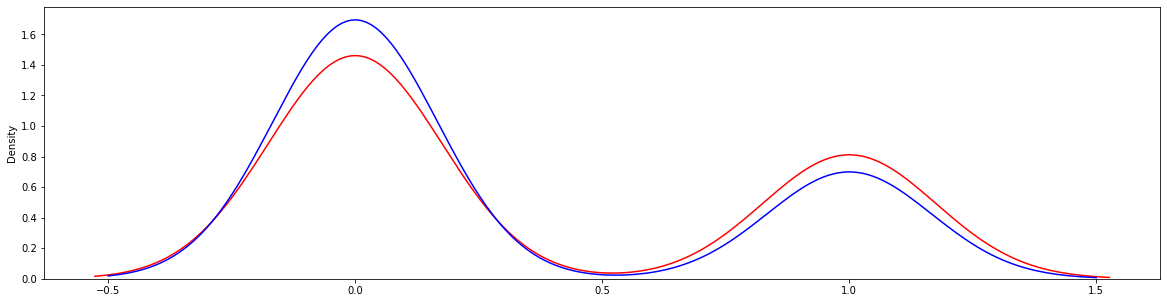

In [ ]:
plt.figure(figsize=[20,5])
ax=sns.distplot(ytest,hist=False,color='r',label="Actual Values")
sns.distplot(yp,hist=False,color='b',label='Predict Value',ax=ax)
plt.show()
plt.close()

In [ ]:
from sklearn.svm import SVC

In [ ]:
model2=SVC(kernel="rbf")

In [ ]:
model2.fit(xtrain,ytrain)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [ ]:
yp2=model2.predict(xtest)

In [ ]:
acc2=accuracy_score(ytest,yp2)

In [ ]:
acc2

0.7792207792207793

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
model3=DecisionTreeClassifier()

In [ ]:
model3.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [ ]:
yp3=model3.predict(xtest)

In [ ]:
acc3=accuracy_score(ytest,yp3)

In [ ]:
acc3

0.6883116883116883

In [ ]:
import sklearn
print(dir(sklearn.svm.__doc__))

['__add__', '__class__', '__contains__', '__delattr__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__getnewargs__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__mod__', '__mul__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__rmod__', '__rmul__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', 'capitalize', 'casefold', 'center', 'count', 'encode', 'endswith', 'expandtabs', 'find', 'format', 'format_map', 'index', 'isalnum', 'isalpha', 'isascii', 'isdecimal', 'isdigit', 'isidentifier', 'islower', 'isnumeric', 'isprintable', 'isspace', 'istitle', 'isupper', 'join', 'ljust', 'lower', 'lstrip', 'maketrans', 'partition', 'replace', 'rfind', 'rindex', 'rjust', 'rpartition', 'rsplit', 'rstrip', 'split', 'splitlines', 'startswith', 'strip', 'swapcase', 'title', 'translate', 'upper', 'zfill']
